In [1]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(inspect.getsource(scipy.stats.norm._pdf))

print(inspect.getsource(scipy.stats.gamma._pdf))

    def _pdf(self, x):
        # norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
        return _norm_pdf(x)

    def _pdf(self, x, a):
        # gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)
        return np.exp(self._logpdf(x, a))



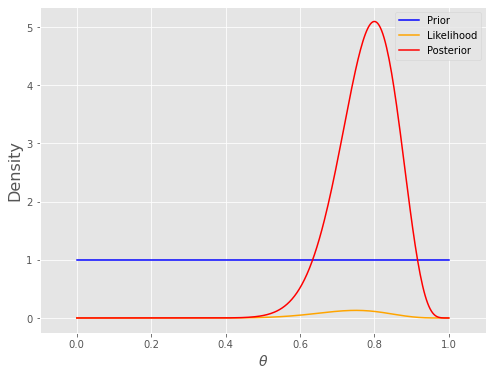

In [3]:
# Likelihood
n = 20
y = 15

def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

# Prior
a0 = 1
b0 = 1
prior = st.beta(a=a0, b=b0)

# Posterior
post = st.beta(a=a0+n, b=b0+(n-y))

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
# 원래는 likelihood 앞에 막 이렇게 곱하면 안되지만...
# 그래도 그 존재라도 알기 위해서... 0이 아니에요 ㅠㅡㅜ
plt.plot(thetas, (10**4)*likelihood(thetas, n, y), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

# 1

In [42]:
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

In [43]:
def PlottingLPP(n,y,a0,b0,likelihoodscale):
    # Prior
    prior = st.beta(a=a0, b=b0)

    # Posterior
    post = st.beta(a=a0+n, b=b0+(n-y))

    # plotting
    thetas = np.linspace(0, 1, 300)
    plt.figure(figsize=(8, 6))
    plt.style.use('ggplot')
    plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    # 원래는 likelihood 앞에 막 이렇게 곱하면 안되지만...
    # 그래도 그 존재라도 알기 위해서... 0이 아니에요 ㅠㅡㅜ
    plt.plot(thetas, likelihoodscale*likelihood(thetas, n, y), label='Likelihood', c='orange')
    plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    plt.xlim([-0.10, 1.10])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('Density', fontsize=16)
    plt.legend();

## 1-1. Strong likelihood x Uninformative prior

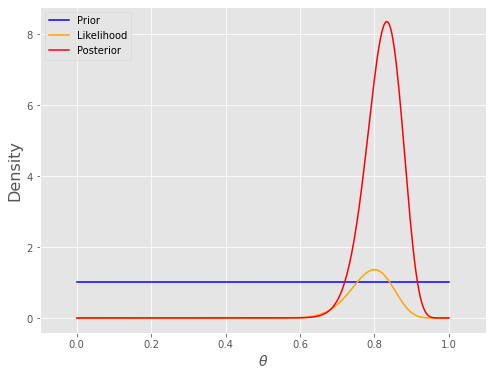

In [53]:
PlottingLPP(50,40,1,1,10**11)

## 1-2. Strong likelihood x Weak prior

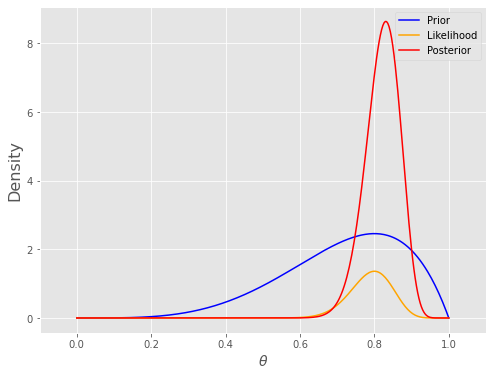

In [57]:
PlottingLPP(50,40,5,2,10**11)

## 1-3. Strong likelihood x Strong prior

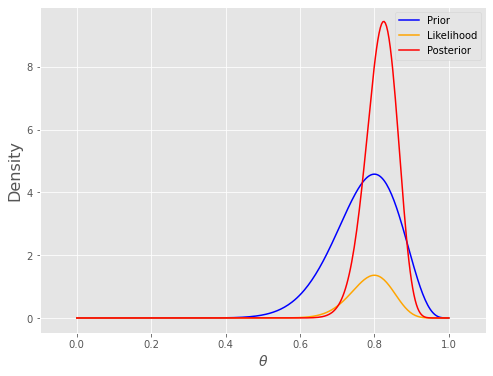

In [66]:
PlottingLPP(50,40,17,5,10**11)

## 1-4. Weak likelihood x Uninformative prior

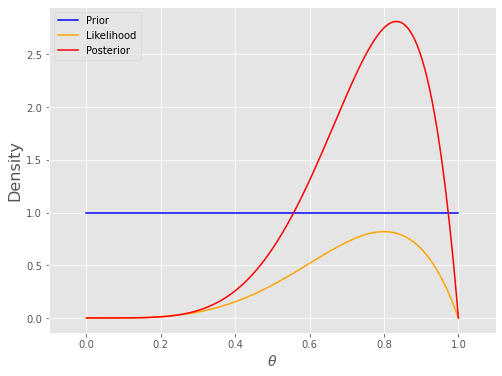

In [69]:
PlottingLPP(5,4,1,1,10)

## 1-5. Weak likelihood x Weak prior

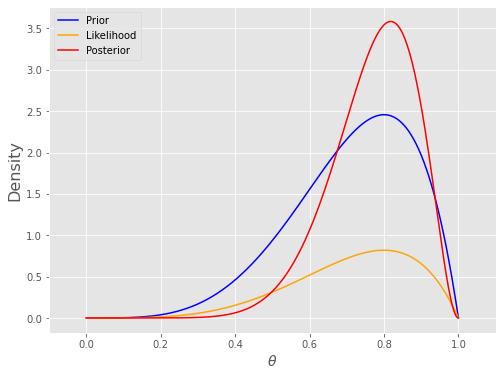

In [74]:
PlottingLPP(5,4,5,2,10)

## 1-6. Weak likelihood x Strong prior

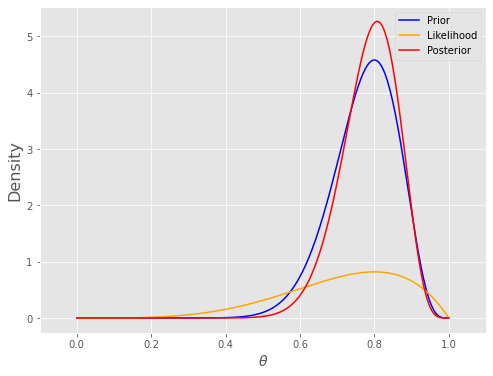

In [73]:
PlottingLPP(5,4,17,5,10)

# 2

![KakaoTalk_20210311_182400970.jpg](KakaoTalk_20210311_182400970.jpg)

![KakaoTalk_20210311_182400970_01.jpg](KakaoTalk_20210311_182400970_01.jpg)

![KakaoTalk_20210311_182400970_02.jpg](KakaoTalk_20210311_182400970_02.jpg)

# 3

## 3-a)

alpha:beta=9:1일 때 평균 9/(1+9)=0.9

In [96]:
for i in range(1,20):
    a=st.beta.cdf(0.97, 9*i, 1*i) - st.beta.cdf(0.8, 9*i,1*i)
    print("(",9*i,",",1*i,"):",a)
    i=+1
    if a>=0.95:
        break

( 9 , 1 ): 0.626013330654565
( 18 , 2 ): 0.8071787111726657
( 27 , 3 ): 0.892715183397574
( 36 , 4 ): 0.9378685312699843
( 45 , 5 ): 0.9630476420328056


alpha=45,beta=5 로 정함

## 3-b)

10명 중 10명 모두 생존 -> n=10, y=10

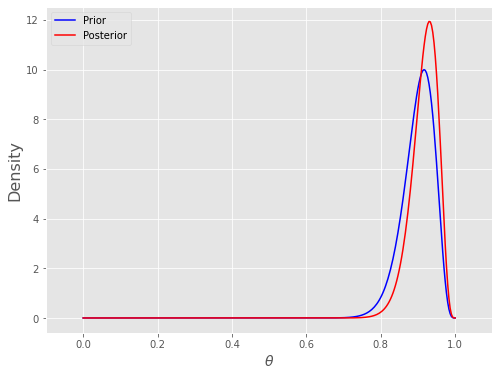

In [98]:
# Prior
prior = st.beta(a=45, b=5)

# Posterior
post = st.beta(a=45+10, b=5+(10-10))

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();